### K-Means Clustering

K-Means Clustering is one of the most important clustering technique that is used to form the clusters from the dataset.

1. The dataset given here is Mall_Customers dataset that contains the Customer_ID, Age, Gender, Annual_Income and Spending Score. It depicts about the details of all the customer going to the Mall.

2. Here K-Means Clustering technique is applied on the dataset so as to identify and detect the clusters from the dataset.

### Steps required for this project:-

1.  Import all the necessary libraries

2.  Load the Dataset

3.  Perform EDA and do complete data preprocessing

4.  Select Relevant Features like ['Annual Income','Spending Score']

5. Visualize the dataset based on the relevant features

6. Find the Optimal number of clusters

7. Train the K Means Model

8. Visualize the Clusters

9. Add the Clusters Labels to the Data

10. Analyze each cluster

### Step  1:   Import all the necessary libraries

In [492]:
import   numpy              as   np
import   pandas             as   pd
import   matplotlib.pyplot  as   plt
import   seaborn            as   sns

from     sklearn.model_selection   import  train_test_split
from     sklearn.preprocessing     import  StandardScaler
from     sklearn.cluster           import  KMeans

### Step 2: Load the Dataset

In [493]:
df = pd.read_csv('Mall_Customers.csv')

In [494]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### OBSERVATIONS:

1.  The above dataset contains all the details of the Customer going to the Mall.

    (a.)   CustomerID ---------->  ID of the Customer.

    (b.)   Genre      ---------->  Gender of the Customer.

    (c.)   Age        ---------->  Age    of the Customer.

    (d.)   Annual Income ------->  Annual Income of the Customer.

    (e.)   Spending Score ------>  Spending Score of the Customer.

### Step 3:  Perform EDA and do complete data preprocessing

In [495]:
### Display the top five reocrds of the dataset

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [496]:
### Display the bottom five reocrds of the dataset

df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [497]:
### get the total length of the records used in the dataset

print("Total length of the record in the dataset is:", len(df))

Total length of the record in the dataset is: 200


In [498]:
### shape of the dataset

df.shape

(200, 5)

In [499]:
### Rename the columns to proper names in the dataset

df.rename(columns={'Annual Income (k$)':'Annual_Income'    ,
                   'Genre'             : 'Gender'          ,
                   'Spending Score (1-100)':'Spending_Score'}, inplace=True)

In [500]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [501]:
### get the columns used in the dataset

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [502]:
### get all the information about the columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [503]:
### get the statistical summary about the dataset

df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### OBSERVATIONS:

1.  The above data provides us about the statistical summary about all the numerical columns used in the dataset.

In [504]:
### Check if there are any NULL Values in the dataset

df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [505]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,CustomerID,Gender,Age,Annual_Income,Spending_Score


### OBSERVATIONS:

1.   There are no duplicate records in the dataset.

### Step 4: Select Relevant Features like ['Annual Income','Spending Score']

In [506]:
X=df[['Annual_Income','Spending_Score']]

In [507]:
print(X)

     Annual_Income  Spending_Score
0               15              39
1               15              81
2               16               6
3               16              77
4               17              40
..             ...             ...
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83

[200 rows x 2 columns]


### Step 5:  Visualize the dataset based on the relevant features

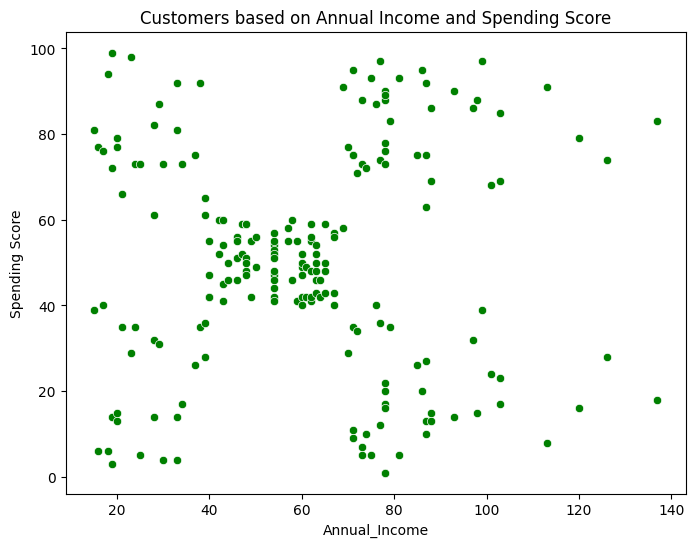

In [508]:
plt.figure(figsize=(8,6))
sns.scatterplot(x= X['Annual_Income'], y = X['Spending_Score'],color='green')
plt.title('Customers based on Annual Income and Spending Score')
plt.xlabel('Annual_Income')
plt.ylabel('Spending Score')
plt.show()

### OBSERVATIONS:

1. A Scatterplot has been built on the original dataset using Mall_Customer dataset beore applying K-Means Clustering Algorithm.

### Step 6:  Find the Optimal number of clusters

[269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33642.579220779226, 26686.83778518778, 24766.471609793443, 23103.122085983916]


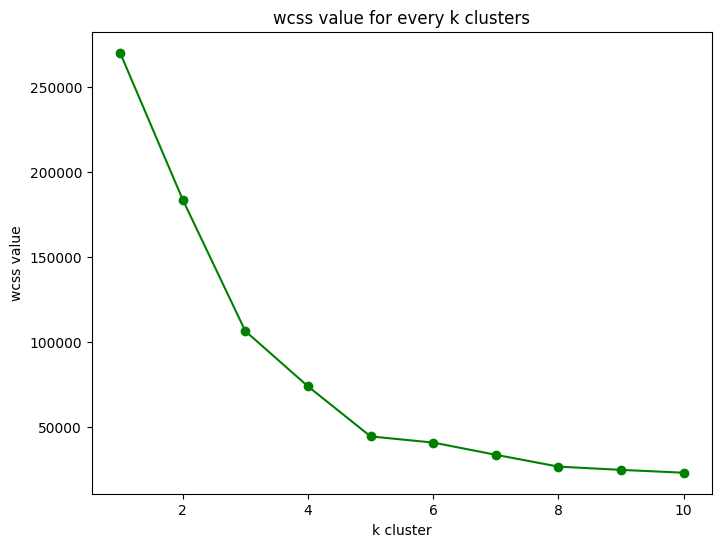

In [509]:
### From the above datapoint, find out the k number of clusters using K-Means Algorithm

### initialize the wcss empty list

wcss = []

### Take a for loop for the clusters ranging from 1 to 10

for k in range(1,11):
    ### iniailze the K-Means model
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=42)
    ### train the K-Means model
    kmeans.fit(X)
    ### Append the kmeans value to the wcss list
    wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker = 'o', color = 'green')
plt.title('wcss value for every k clusters')
plt.xlabel('k cluster')
plt.ylabel('wcss value')
plt.show()

### OBSERVATIONS:

1. From the above graph, we can see that as the k-cluster value increases, wcss value decreases rapidly.

2. But when k(k cluster) = 5, the wcss curve has stopped decreasing that much and the curve value has gone flat beyond that point.

3. So the optimal number of cluster for the Mall_Customers dataset using K-Means Algorithm is 5.

### Step 7:  Train the K Means Model

In [510]:
### Create an object for KMeans Model

kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)

### using the object for kmeans, train and predict the cluster labels for these data points

Y_pred = kmeans.fit_predict(X)

print(Y_pred)


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### OBSERVATIONS:

1. The K-Means Model has been trained using the dataset and KMeans model.

2. Then the cluster label has been predicted for every data point record in the dataset.

### Step 8:  Visualize the Clusters

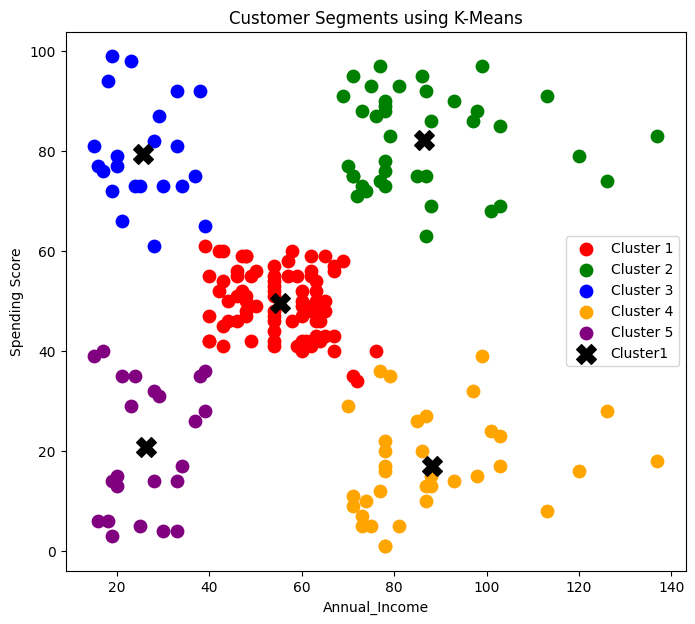

In [511]:
plt.figure(figsize=(8,7))

plt.scatter(X.iloc[Y_pred == 0,0], X.iloc[Y_pred == 0,1], s = 80, c = 'red',    label  =     'Cluster 1')
plt.scatter(X.iloc[Y_pred == 1,0], X.iloc[Y_pred == 1,1], s = 80, c = 'green',  label  =     'Cluster 2')
plt.scatter(X.iloc[Y_pred == 2,0], X.iloc[Y_pred == 2,1], s = 80, c = 'blue',   label   =    'Cluster 3')
plt.scatter(X.iloc[Y_pred == 3,0], X.iloc[Y_pred == 3,1], s = 80, c = 'orange', label  =     'Cluster 4')
plt.scatter(X.iloc[Y_pred == 4,0], X.iloc[Y_pred == 4,1], s = 80, c = 'purple', label  =     'Cluster 5')


## Clusters Center

## To mark the centroid

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='black',s=200,marker='X',label = 'Cluster1')
plt.title('Customer Segments using K-Means')
plt.xlabel('Annual_Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### OBSERVATIONS:

1. From the above graph, we can see that there are five clusters formed using K-Means Clsutering Algorithm.

2. A Centroid is formed at the middle of every cluster.

### Step 9: Add the Clusters Labels to the Data

In [512]:
df['Labels'] = Y_pred

In [513]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Labels
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


### OBSERVATIONS:

1. A Cluster Label has been  formed for each and every record in the dataset.

### Step 10: Analyze each cluster

In [514]:
data_summary = df.groupby('Labels')[['Annual_Income','Spending_Score']].mean()

In [515]:
data_summary

,Annual_Income,Spending_Score
Labels,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


### OBSERVATIONS:

1. Here we have obtained the mean value of Annual Income and Spending Score for every cluster label.